# Detecting outliers
## Validating with and without outliers.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our traning dataset
df = pd.read_csv("train.csv")

In [3]:
#changing column headers for simplicity 
lower = lambda x:x.lower()
under = lambda x:x.replace(" ","_")
df.columns = df.columns.map(lower)
df.columns = df.columns.map(under)

In [4]:
df.head()

,id,agency,agency_type,distribution_channel,product_name,duration,destination,net_sales,commision_(in_value),age,claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [5]:
#Quick method done to check which columns are categorical number of categories they have.
for col in df.columns:
    print(df[col].value_counts())
    print("-"*25)

5696    20
2002    17
4515    17
9165    16
4080    16
        ..
6768     1
6748     1
2141     1
4172     1
3651     1
Name: id, Length: 7992, dtype: int64
-------------------------
EPX    26218
C2B    10615
CWT     6813
JZI     4619
LWC      806
SSI      780
JWT      550
RAB      527
TST      394
KML      313
ART      223
CCR      156
TTW      104
CBH       76
CSR       60
ADM       56
Name: agency, dtype: int64
-------------------------
Travel Agency    34996
Airlines         17314
Name: agency_type, dtype: int64
-------------------------
Online     51419
Offline      891
Name: distribution_channel, dtype: int64
-------------------------
Cancellation Plan                       13254
2 way Comprehensive Plan                10555
Rental Vehicle Excess Insurance          6813
Bronze Plan                              4723
Basic Plan                               4042
Silver Plan                              2862
1 way Comprehensive Plan                 2409
Annual Silver Plan          

In [6]:
#dividing column headers to two different lists so they can be used while looping.
cat_col = ["agency","agency_type","distribution_channel","product_name","destination","claim"]
num_col = [col for col in df.columns if col not in cat_col]

In [7]:
#removing negative values duration has 
df = df[df.duration>0]

### Agency and Product_name columns are categorical but have large number of unique categories so those categories were sorted with respect to their counts and top few categories were retained and rest were replaced by "other".

In [8]:
agency_other = []
for val in range(df.agency.nunique()):
    if df.agency.value_counts()[val] < 1000:
        agency_other.append(df.agency.value_counts().index[val])

In [9]:
df.agency = df.agency.map(lambda x:"other" if x in agency_other else x)

In [10]:
df.agency.value_counts()

EPX      26217
C2B      10612
CWT       6812
JZI       4607
other     4016
Name: agency, dtype: int64

In [11]:
product_other = []
for val in range(df.product_name.nunique()):
    if df.product_name.value_counts()[val] < 850:
        product_other.append(df.product_name.value_counts().index[val])

In [12]:
df.product_name = df.product_name.map(lambda x: "other" if x in product_other else x)

In [13]:
df.product_name.value_counts()

Cancellation Plan                  13254
2 way Comprehensive Plan           10555
Rental Vehicle Excess Insurance     6812
Bronze Plan                         4721
Basic Plan                          4030
other                               3328
Silver Plan                         2861
1 way Comprehensive Plan            2408
Annual Silver Plan                  2348
Value Plan                          1947
Name: product_name, dtype: int64

### The feature Destination is also a categorical column and had alot of categories not previous method didn't seem appropriate as the counts of the columns didn't drastically change. So 
### So the method used is "Frequency encoding", where the class is replaced with it's count.

In [14]:
dest_dict = df.destination.value_counts().to_dict()
df.destination = df.destination.map(dest_dict)

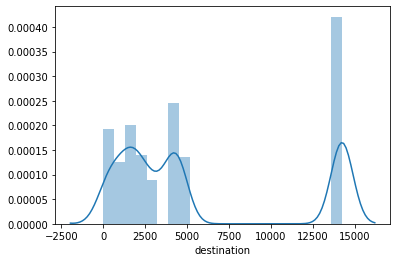

In [15]:
sns.distplot(df.destination)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52264 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52264 non-null  int64  
 1   agency                52264 non-null  object 
 2   agency_type           52264 non-null  object 
 3   distribution_channel  52264 non-null  object 
 4   product_name          52264 non-null  object 
 5   duration              52264 non-null  int64  
 6   destination           52264 non-null  int64  
 7   net_sales             52264 non-null  float64
 8   commision_(in_value)  52264 non-null  float64
 9   age                   52264 non-null  int64  
 10  claim                 52264 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.8+ MB


In [17]:
from outlier import iqr

In [18]:
num_col.append("destination")

## Without outliers with IQR method

In [19]:
#making deep copy of dataset
wo_outliers = df.copy()

In [20]:
#removing outliers from numeric columns
for col in num_col:
        low, high = iqr(wo_outliers[col])
        wo_outliers = wo_outliers[(wo_outliers[col] > low) & (wo_outliers[col] <high)]

In [21]:
#checking shape to see whether number of rows are reduced as outliers are removed
wo_outliers.shape

(34671, 11)

##  Winsorization: Using another method of removing outliers 

In [22]:
win_df = df.copy()

In [23]:
from outlier import winsor

In [24]:
for col in num_col:
    win_df = winsor(win_df,col)

In [25]:
print(f"shape of orignal data = {df.shape},\nshape of without outliers data = {wo_outliers.shape}, \nshape of winsorted data = {win_df.shape}")

shape of orignal data = (52264, 11),
shape of without outliers data = (34671, 11), 
shape of winsorted data = (48662, 11)


## Comparing results of raw data with outliers, outliers removed by IQR method and Winsorization

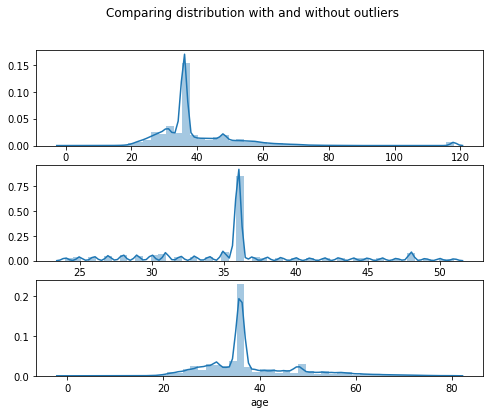

In [26]:
fig, axes = plt.subplots(3,1, figsize=(8,6))
sns.distplot(df.age, ax=axes[0])
sns.distplot(wo_outliers.age, ax=axes[1])
sns.distplot(win_df.age, ax=axes[2])
plt.suptitle("Comparing distribution with and without outliers")
plt.show()

In [27]:
def numeric(df):
    df_num = df.select_dtypes(exclude = "object")
    for col in df_num.columns:
        q1 = round(np.percentile(df[col], 0.25),2)
        q3 = round(np.percentile(df[col], 0.75),2)
        kurtosis = round(df[col].kurt(),2)
        test = df[col].skew()
        sns.distplot(df[col])
        print("q1 = " + str(q1))
        print("q3 = " + str(q3))
        print("Kurtosis = " + str(kurtosis))
        print( "skew = " + str(round(test,2)))        
        plt.show()
    return None

q1 = 2020.0
q3 = 2057.97
Kurtosis = -1.19
skew = -0.0


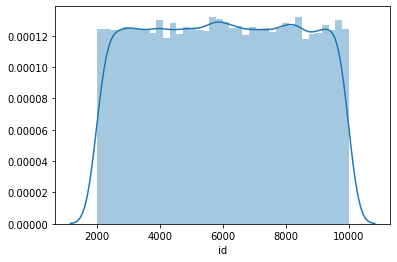

q1 = 1.0
q3 = 1.0
Kurtosis = 600.35
skew = 15.35


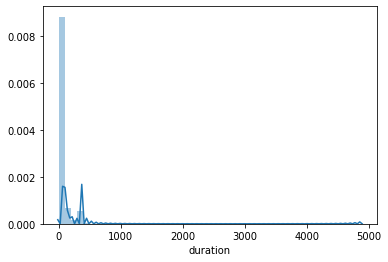

q1 = -69.3
q3 = -25.07
Kurtosis = 10.87
skew = 2.81


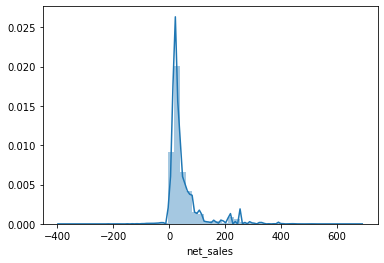

q1 = 0.0
q3 = 0.0
Kurtosis = 18.35
skew = 3.53


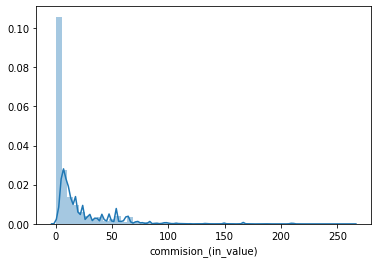

q1 = 18.0
q3 = 21.0
Kurtosis = 13.16
skew = 2.94


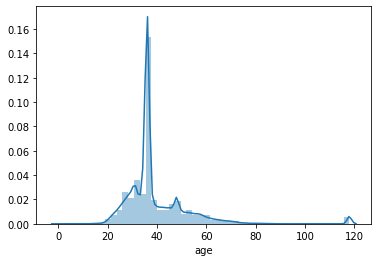

q1 = 9.0
q3 = 26.0
Kurtosis = -1.05
skew = 0.83


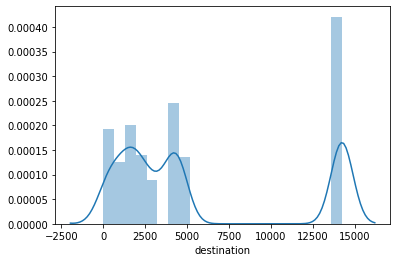

In [28]:
df_graph = pd.DataFrame()
for  col in num_col:
    df_graph[col] = df[col]
numeric(df_graph)

q1 = 2019.0
q3 = 2054.0
Kurtosis = -1.19
skew = -0.01


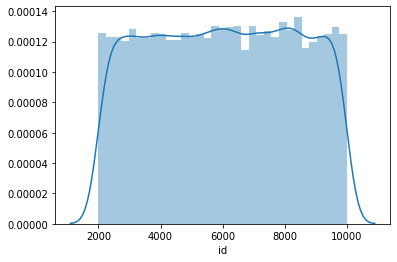

q1 = 1.0
q3 = 1.0
Kurtosis = 1.46
skew = 1.43


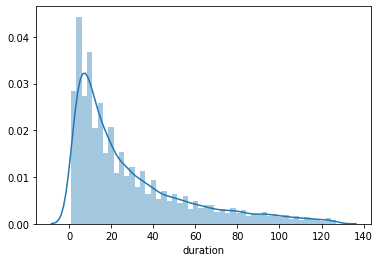

q1 = 0.0
q3 = 0.0
Kurtosis = 0.78
skew = 1.08


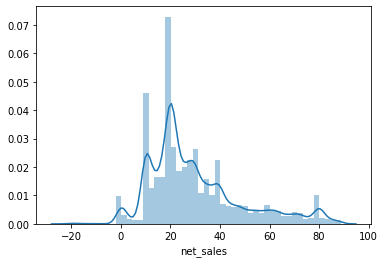

q1 = 0.0
q3 = 0.0
Kurtosis = 1.31
skew = 1.52


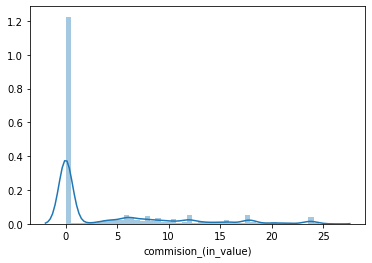

q1 = 24.0
q3 = 24.0
Kurtosis = 0.52
skew = 0.47


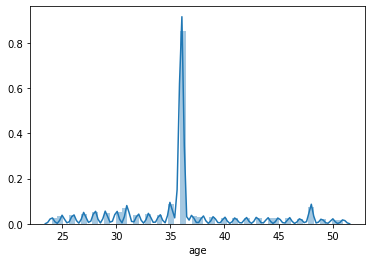

q1 = 9.0
q3 = 26.0
Kurtosis = -0.88
skew = 0.92


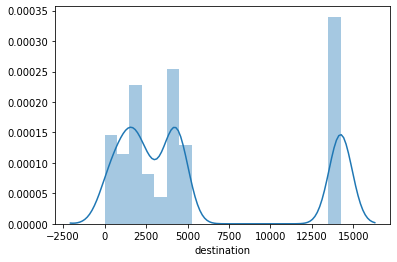

In [29]:
wo_graph = pd.DataFrame()
for  col in num_col:
    wo_graph[col] = wo_outliers[col]
numeric(wo_graph)

q1 = 2020.0
q3 = 2057.0
Kurtosis = -1.19
skew = -0.0


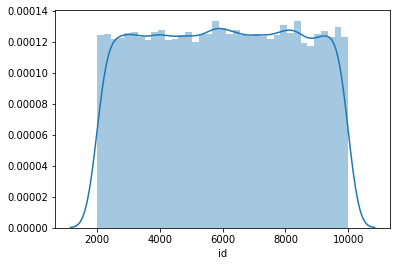

q1 = 1.0
q3 = 1.0
Kurtosis = 11.48
skew = 3.25


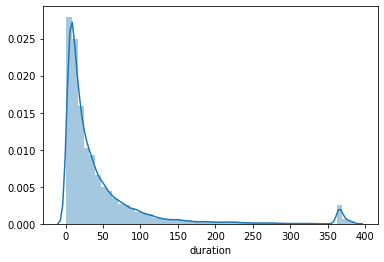

q1 = -59.4
q3 = -19.8
Kurtosis = 7.99
skew = 2.36


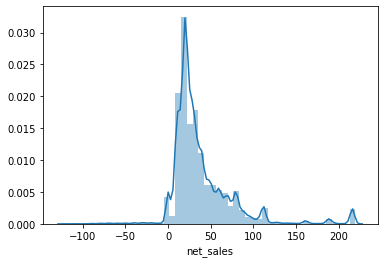

q1 = 0.0
q3 = 0.0
Kurtosis = 3.49
skew = 2.01


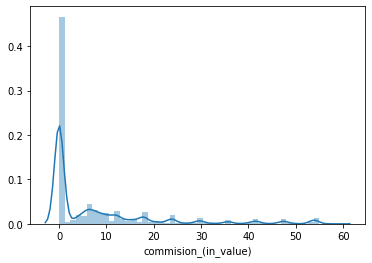

q1 = 18.0
q3 = 21.0
Kurtosis = 1.77
skew = 1.16


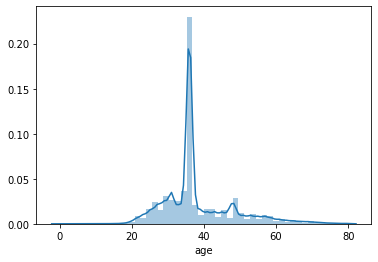

q1 = 9.0
q3 = 25.0
Kurtosis = -0.93
skew = 0.89


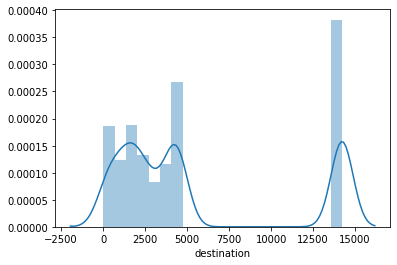

In [31]:
win_graph = pd.DataFrame()
for  col in num_col:
    win_graph[col] = win_df[col]
numeric(win_graph)

### Concluding winsorization (last graph) having better distribution.
### Further feature process will be done on data with IRQ outlier removal method.